In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, precision_recall_curve

In [174]:
df = pd.read_csv('californiabin.csv')
df.head()

,4.168499999999999872e+00,2.000000000000000000e+01,6.700636942675159524e+00,1.178343949044585948e+00,7.450000000000000000e+02,2.372611464968152895e+00,3.879999999999999716e+01,-1.211500000000000057e+02,1.000000000000000000e+00
0,2.8194,24.0,4.762500,1.020833,608.0,2.533333,36.75,-119.85,0.0
1,2.4250,46.0,4.927711,1.018072,772.0,2.325301,36.33,-119.31,0.0
2,3.1205,16.0,3.728477,1.101545,1260.0,2.781457,33.87,-117.99,0.0
3,4.3889,41.0,5.741007,1.199041,837.0,2.007194,34.15,-118.40,1.0
4,2.9934,52.0,3.441379,1.020690,318.0,2.193103,37.57,-122.32,1.0


In [175]:
data = df.values
data.shape

(1999, 9)

In [176]:
attributes = data[:, :-1]
targets = data[:, -1]

In [177]:
hyperparameters = {
    'svc__C' : [2**i for i in range(-5, 16, 2)],
    'svc__kernel' : ['rbf'],
    'svc__gamma' : [2**i for i in range(-15, 4, 2)]
}

hyperparameters

{'svc__C': [0.03125, 0.125, 0.5, 2, 8, 32, 128, 512, 2048, 8192, 32768],
 'svc__kernel': ['rbf'],
 'svc__gamma': [3.0517578125e-05,
  0.0001220703125,
  0.00048828125,
  0.001953125,
  0.0078125,
  0.03125,
  0.125,
  0.5,
  2,
  8]}

In [178]:
train_attributes, test_attributes, train_targets, test_targets = train_test_split(attributes, targets, test_size=0.2, random_state=42)

In [179]:
kfold = KFold(n_splits= 10, shuffle= True, random_state= 42)

In [180]:
svc = SVC(kernel='rbf', probability=True)

In [181]:
pipe = Pipeline([('scaler', MinMaxScaler()), ('svc', svc)])

In [182]:
gs = GridSearchCV(estimator= pipe, param_grid= hyperparameters, cv= 10, n_jobs=-1)

In [183]:
gs.fit(train_attributes, train_targets)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc', SVC(probability=True))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.03125, 0.125, 0.5, 2, 8, 32, 128, 512,
                                    2048, 8192, 32768],
                         'svc__gamma': [3.0517578125e-05, 0.0001220703125,
                                        0.00048828125, 0.001953125, 0.0078125,
                                        0.03125, 0.125, 0.5, 2, 8],
                         'svc__kernel': ['rbf']})

In [184]:
gs.score(test_attributes, test_targets)

0.8275

In [185]:
best_model = gs.best_estimator_
best_model.fit(train_attributes, train_targets)


prediction = best_model.predict(test_attributes)

In [186]:
gs.best_estimator_

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc', SVC(C=2, gamma=8, probability=True))])

In [187]:
acc = accuracy_score(test_targets, prediction)
acc

0.8275

In [188]:
roc = roc_curve(test_targets, prediction)
roc

(array([0.       , 0.1509434, 1.       ]),
 array([0.        , 0.80319149, 1.        ]),
 array([2., 1., 0.]))

In [189]:
prec = precision_score(test_targets, prediction)
prec

0.825136612021858

In [190]:
f1 = f1_score(test_targets, prediction)
f1

0.8140161725067386

In [191]:
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, auc

metrics = [None, None, None, None]

metrics[0] = acc
metrics[1] = roc_curve(test_targets, prediction)
metrics[2] = prec
metrics[3] = f1

In [192]:
test_targets

array([0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0.

In [193]:
prediction.shape

(400,)

In [194]:
roc_curve(test_targets, prediction)

(array([0.       , 0.1509434, 1.       ]),
 array([0.        , 0.80319149, 1.        ]),
 array([2., 1., 0.]))

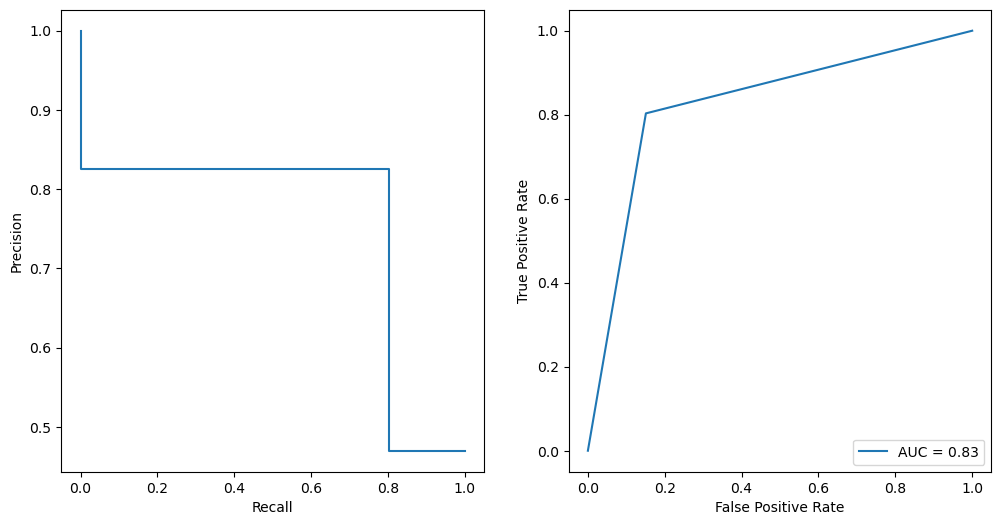

In [195]:
pr = PrecisionRecallDisplay(precision=precision_recall_curve(test_targets, prediction)[0], recall= precision_recall_curve(test_targets, prediction)[1])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
pr.plot(ax=axes[0])

roc = RocCurveDisplay(fpr=metrics[1][0], tpr=metrics[1][1], roc_auc=auc(metrics[1][0], metrics[1][1]))
roc.plot(ax=axes[1])

In [196]:
prediction.shape

(400,)

In [197]:
test_targets.shape

(400,)

In [198]:
auc(metrics[1][0], metrics[1][1])

0.8261240465676436

In [199]:
final_cv = GridSearchCV(estimator= pipe, param_grid= hyperparameters, cv= 10, n_jobs=-1)
final_cv.fit(attributes, targets)
best_params = final_cv.best_params_
best_params

{'svc__C': 32768, 'svc__gamma': 0.5, 'svc__kernel': 'rbf'}

In [200]:
final_model = SVC(probability=True, C=best_params['svc__C'], kernel=best_params['svc__kernel'], gamma=best_params['svc__gamma'])

final_model.fit(attributes, targets.astype(float))

SVC(C=32768, gamma=0.5, probability=True)